In [1]:
%load_ext autoreload
%autoreload 2

import glob
import os

import matplotlib.pyplot as plt
import model as m
import numpy as np
import torchvision.transforms as transforms
from data import get_skinlesion, standardize_skinlesion_inv

In [2]:
train_dataset, val_dataset, test_dataset, train_loader, val_loader, test_loader = get_skinlesion(
    batch_size=4, num_workers=4, data_augmentation=True)
len(train_dataset), len(val_dataset), len(test_dataset)

(160, 20, 20)

In [13]:
#Open sam predictions and ground truth labels:
folder = "sam_predictions/skinles/"

import os
images = sorted(os.listdir(folder)) 

from PIL import Image 
import numpy as np 

preds = []
for image in images:
    if "image" in image or ".ipynb" in image:
        continue
    im = Image.open(folder + image)
    preds.append(np.asarray(im)) 



In [14]:
plotted_set = [test_dataset[3],test_dataset[2],test_dataset[1],test_dataset[0]]

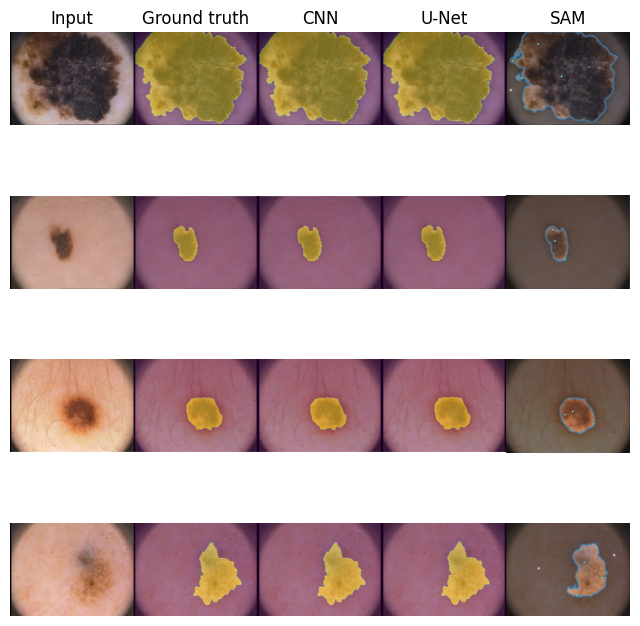

In [15]:
fig, axs = plt.subplots(4, 5, figsize=(8, 8.5))
fig.subplots_adjust(wspace=0.0, hspace=0.0)
titles = ['Input', 'Ground truth', 'CNN', 'U-Net', 'SAM']

for ax, title in zip(axs[0], titles):
    ax.set_title(title)

for i, (im, label) in enumerate(plotted_set):
    im = standardize_skinlesion_inv(im)

    for ax in axs.ravel():
        ax.axis('off')
    
    ax0, ax1, ax2, ax3, ax4 = axs[i]

    ax0.imshow(np.moveaxis(im.numpy(), 0, 2))
    ax1.imshow(np.moveaxis(im.numpy(), 0, 2))
    ax1.imshow(label.numpy()[0], alpha=.4)
    ax2.imshow(np.moveaxis(im.numpy(), 0, 2))
    ax2.imshow(label.numpy()[0], alpha=.4)
    ax3.imshow(np.moveaxis(im.numpy(), 0, 2))
    ax3.imshow(label.numpy()[0], alpha=.4)
    ax4.imshow(preds[i])

# Felix plan B - Save the images here hahaha
Already run, just edit above!

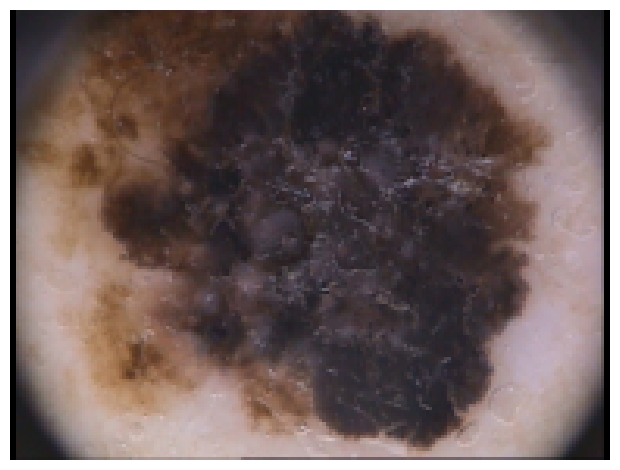

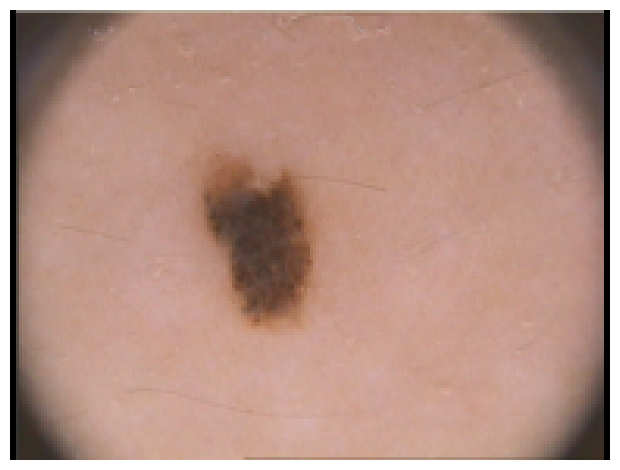

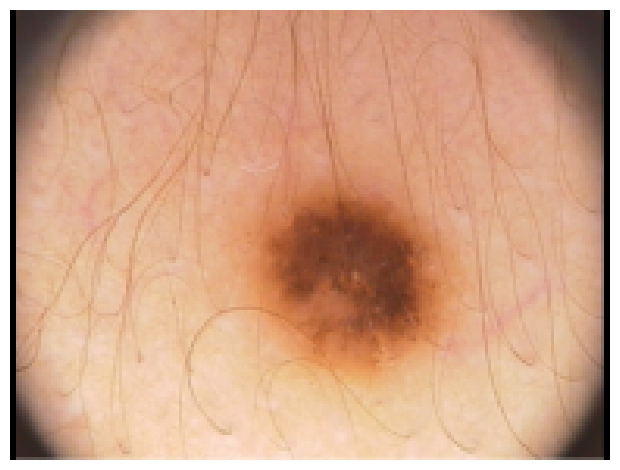

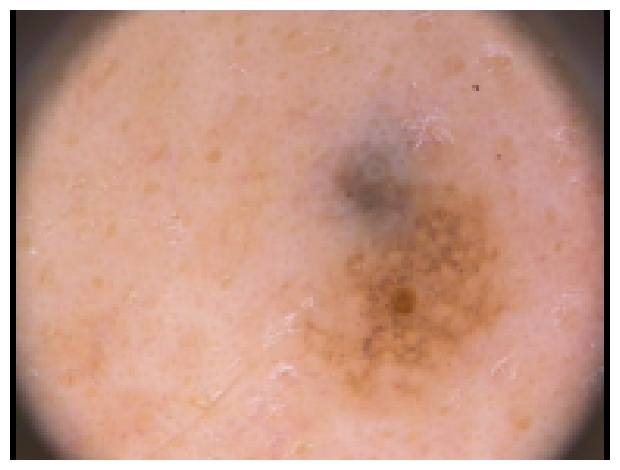

In [10]:
#Save figures
for i, (im, label) in enumerate(plotted_set):
    fig, axs = plt.subplots()
    im = standardize_skinlesion_inv(im)
    axs.axis('off')
    plt.imshow(np.moveaxis(im.numpy(), 0, 2))
    plt.tight_layout()
    plt.savefig(f'sam_predictions/skinles/images/test_im_{i}.png')
    